In [2]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from IPython.display import HTML
style = "<style>svg{width:70% !important;height:70% !important;}</style>"
HTML(style)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
np.random.seed(0)

# **№ 2.4.12**

In [ ]:
train_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_iris.csv')
test_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/test_iris.csv')

In [ ]:
X_train = train_data.drop(['Unnamed: 0', 'species'], axis=1)
X_test = test_data.drop(['Unnamed: 0', 'species'], axis=1)
y_train = train_data.species
y_test = test_data.species

In [ ]:
scores_data = pd.DataFrame()
for depth in range(1, 100):
  clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=depth)
  clf.fit(X_train, y_train)
  train_score = clf.score(X_train, y_train)
  test_score = clf.score(X_test, y_test)
  temp_scores_data = pd.DataFrame({
                                    'max_depth': [depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score]
                                   })
  scores_data = scores_data.append(temp_scores_data)

In [ ]:
scores_data.head()

,max_depth,train_score,test_score
0,1,0.7,0.6
0,2,1.0,1.0
0,3,1.0,1.0
0,4,1.0,1.0
0,5,1.0,1.0


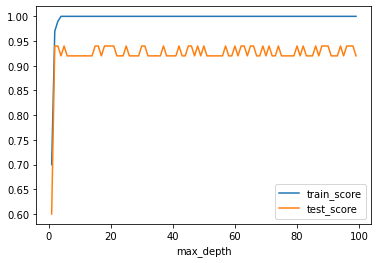

In [ ]:
scores_data.plot(x='max_depth', y=['train_score', 'test_score'])

# **№ 2.4.15**

In [ ]:
animal_train_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/dogs_n_cats.csv')

In [ ]:
animal_train_data.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка


In [ ]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
X_train1 = animal_train_data.drop(['Вид'], axis=1)
y_train1 = animal_train_data.Вид

In [ ]:
clf.fit(X_train1, y_train1)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
animal_test_data = pd.read_json('dataset_209691_15.txt')
animal_test_data.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,18,21.6,1,1,0
1,32,38.4,1,0,0
2,29,34.8,1,0,0
3,34,40.8,1,1,0
4,34,40.8,1,1,0


In [ ]:
hh = clf.predict(animal_test_data)
l = list(hh)
l.count('собачка')

55

# **№ 2.5.13**

In [ ]:
songs_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/songs.csv')
songs_data.head()

,song,year,artist,genre,lyrics,length,commas,exclamations,colons,hyphens
0,the-ownerz,2007,gangstarr,Hip-Hop,"""One-two..""\n""One-two, shots to the chin.. kno...",1300,24,5,0,11
1,dead-sound-of-misery,2006,blind-guardian,Metal,It's dark\nLet's do it now\nBring in the siren...,1566,0,0,0,0
2,modred-s-song,2006,blind-guardian,Metal,I've lost my battle before it starts\nmy first...,996,1,0,1,0
3,the-ninth-wave,2015,blind-guardian,Metal,As dark night embraces\nWe are the nation\nI w...,2868,5,0,0,0
4,skills,2014,gangstarr,Hip-Hop,"Skills, skills, skills\n""My Microphone""\n""It's...",3351,22,0,0,3


In [ ]:
X = songs_data.drop(['song', 'year', 'genre', 'lyrics', 'artist'], axis=1)
y = songs_data.artist

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
clf = tree.DecisionTreeClassifier()

In [ ]:
clf.fit(X_train, y_train)

In [ ]:
predictions = clf.predict(X_test)
precision = precision_score(y_test, predictions, average='micro')
precision

0.6302521008403361

# **№ 2.7.3**

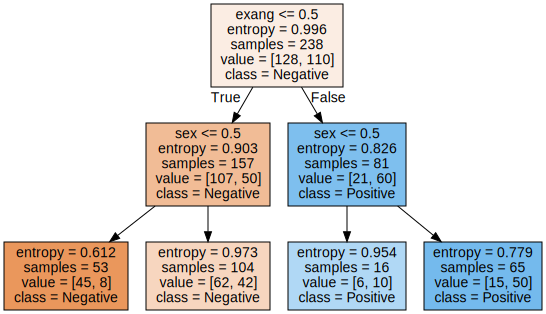

In [ ]:
data = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_data_tree.csv')
clf = tree.DecisionTreeClassifier(criterion='entropy')
X = data.drop(['num'], axis=1)
y = data.num
clf.fit(X, y)
graph = Source(tree.export_graphviz(clf,
                                    out_file=None,
                                    feature_names=list(X),
                                    class_names=['Negative', 'Positive'],
                                    filled=True))
display(SVG(graph.pipe(format='svg')))

# **№ 2.7.6**

In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
clf = tree.DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
predicted

# **№ 2.7.10**

In [ ]:
clf = tree.DecisionTreeClassifier()
parameters = {'max_depth': range(1, 11), 'min_samples_split': range(2, 11), 'min_samples_leaf': range(1, 11)}
search = GridSearchCV(clf, parameters, cv=5)
search.fit(X, y)
best_tree = search.best_estimator_

# **№ 3.2.13**

In [ ]:
heart_data = pd.read_csv('heart_cleveland_upload.csv')

In [ ]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [ ]:
y = heart_data.condition
X = heart_data.drop(['condition'], axis=1)

In [ ]:
rf = RandomForestClassifier(n_estimators=10, max_depth=5)

In [ ]:
rf.fit(X, y)

RandomForestClassifier(max_depth=5, n_estimators=10)

In [ ]:
feature_importances = rf.feature_importances_

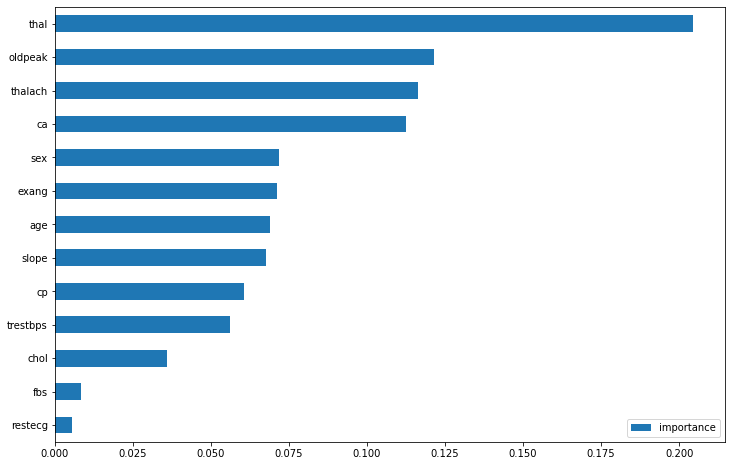

In [ ]:
imp = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

# **№ 3.5.3**

In [17]:
data = pd.read_csv('https://stepik.org/media/attachments/course/4852/training_mush.csv')

In [18]:
y = data['class']
X = data.drop(['class'], axis=1)

In [19]:
rf = RandomForestClassifier(random_state=0, n_jobs=-1)
parameters = {
    'n_estimators':range(10,51,10),
'max_depth':range(1,13,2),
'min_samples_leaf':range(1,8),
'min_samples_split':range(2,10,2)   
}
grid_clf = GridSearchCV(rf, parameters, cv=3, n_jobs=-1)

In [20]:
grid_clf.fit(X, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': range(1, 13, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(10, 51, 10)})

In [ ]:
grid_clf.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

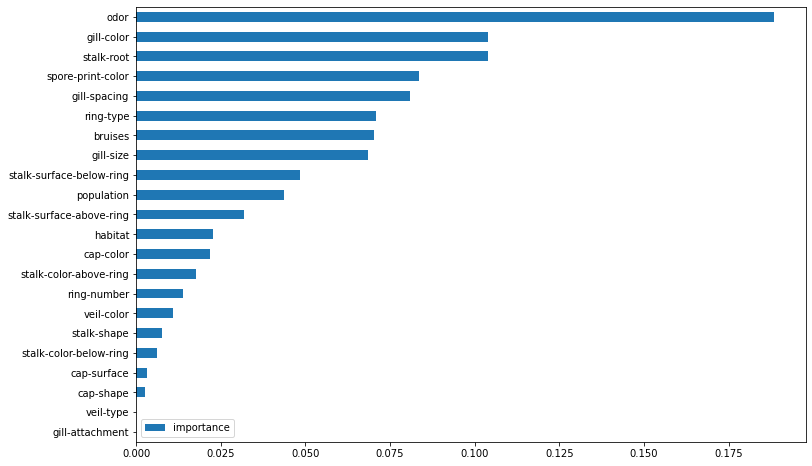

In [21]:
imp = pd.DataFrame(grid_clf.best_estimator_.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [22]:
test_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/testing_mush.csv')

In [23]:
predictions = grid_clf.best_estimator_.predict(test_data)

In [ ]:
list(predictions).count(1)

976

In [24]:
answers = pd.read_csv('testing_y_mush.csv')

In [26]:
from sklearn.metrics import confusion_matrix

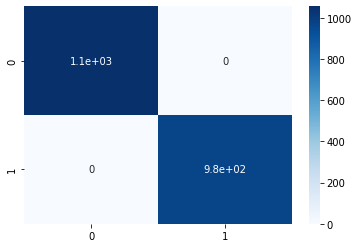

In [27]:
sns.heatmap(confusion_matrix(answers, predictions), annot=True, cmap="Blues")

In [3]:
invasion_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/invasion.csv')

In [32]:
invasion_data.head(10)

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806
5,cruiser,11.839620,11.175053,14.148615,0.727049,366230,344.868989
6,transport,3.583082,9.118069,62.573389,0.529416,268752,48.811194
7,fighter,16.185380,3.686698,561.239067,0.177024,130305,11.063792
8,transport,3.428605,7.933889,63.785882,0.445259,358659,46.378304
9,transport,3.632056,8.945299,62.771709,0.361815,493153,43.070987


In [26]:
ships = {'transport': 1, 'cruiser': 2, 'fighter': 3}
y_train = invasion_data['class'].map(ships)
X_train = invasion_data.drop(['class', 'ship'], axis=1)

In [27]:
X_train.head()

,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,12.876769,2.452950,195.805771,0.150446,23109,11.328806


In [28]:
clf = RandomForestClassifier(random_state=0, n_jobs=-1)
parameters = {'criterion': ['gini', 'entropy'],
              'n_estimators': range(10, 51, 10),
              'min_samples_leaf': range(1, 8),
              'min_samples_split': range(2, 13, 2)
              }

In [29]:
grid_clf = GridSearchCV(clf, parameters, cv=5, n_jobs=-1)

In [30]:
grid_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 13, 2),
                         'n_estimators': range(10, 51, 10)})

In [31]:
best_clf = grid_clf.best_estimator_

In [32]:
X_test = pd.read_csv('https://stepik.org/media/attachments/course/4852/operative_information.csv')

In [33]:
predictions = best_clf.predict(X_test)

In [37]:
list(predictions).count(3)

675

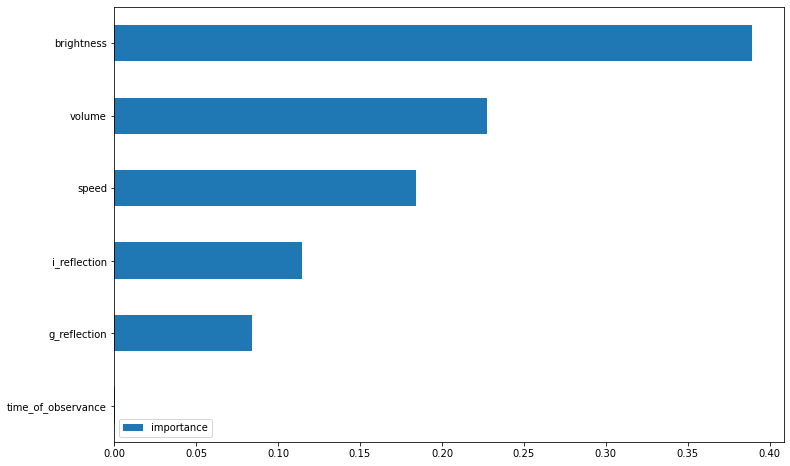

In [39]:
imp = pd.DataFrame(best_clf.feature_importances_, index=X_test.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [40]:
dangerous_places_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/space_can_be_a_dangerous_place.csv')

In [42]:
y = dangerous_places_data.dangerous
X = dangerous_places_data.drop(['dangerous'], axis=1)

In [46]:
clf = RandomForestClassifier(n_jobs=-1)
parameters = {'criterion': ['gini', 'entropy'],
              'n_estimators': range(10, 51, 10),
              'min_samples_leaf': range(1, 8),
              'min_samples_split': range(2, 13, 2)
              }


In [50]:
from sklearn.model_selection import RandomizedSearchCV

In [51]:
grid_clf = RandomizedSearchCV(clf, parameters, cv=5, n_jobs=-1)

In [52]:
grid_clf.fit(X, y)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'min_samples_leaf': range(1, 8),
                                        'min_samples_split': range(2, 13, 2),
                                        'n_estimators': range(10, 51, 10)})

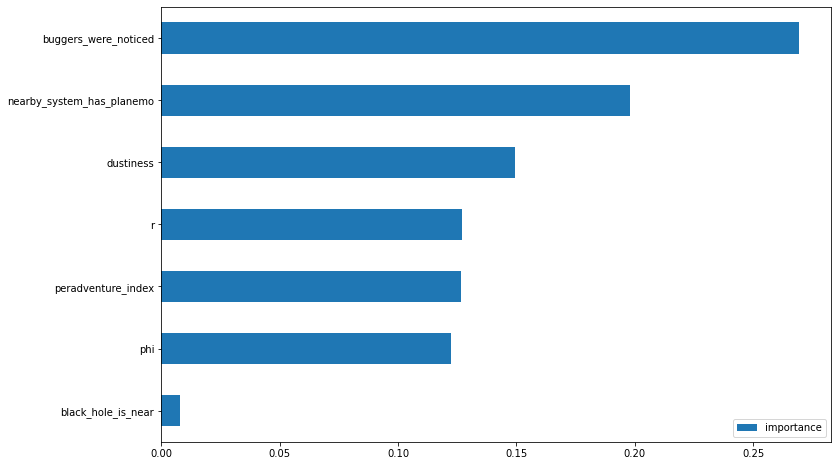

In [53]:
imp = pd.DataFrame(grid_clf.best_estimator_.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [54]:
iris_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/iris.csv')

In [56]:
iris_data.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,0,5.1,3.5,1.4,0.2,0
1,1,4.9,3.0,1.4,0.2,0
2,2,4.7,3.2,1.3,0.2,0
3,3,4.6,3.1,1.5,0.2,0
4,4,5.0,3.6,1.4,0.2,0


In [55]:
from time import time

In [61]:
sum_time = 0
for i in range(10):
  before1 = time()
  m1 = iris_data.describe().loc['mean']
  after1 = time()
  sum_time += (after1 - before1)
sum_time / 10

0.02405071258544922

In [62]:
sum_time = 0
for i in range(10):
  before2 = time()
  m2 = iris_data.mean(axis=0)
  after2 = time()
  sum_time += (after2 - before2)
sum_time / 10

0.0009545087814331055

In [63]:
sum_time = 0
for i in range(10):
  before2 = time()
  m2 = iris_data.apply('mean')
  after2 = time()
  sum_time += (after2 - before2)
sum_time / 10

0.001317739486694336

In [64]:
sum_time = 0
for i in range(10):
  before2 = time()
  m2 = iris_data.apply(np.mean)
  after2 = time()
  sum_time += (after2 - before2)
sum_time / 10

0.0026233434677124024